<a href="https://colab.research.google.com/github/JuanCappelletti/Robotica/blob/main/Robotload_kp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Librerias`***

---



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from math import sqrt

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data





# ***`Cargas de curva `***


---





In [3]:

#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Robotica/Curvas-de-carga/diccionario.csv" 
Diccionario = pd.read_csv(Url,sep=",")
#@markdown Seleccionar Robot:
select = "6700/235/265" #@param ["6700/235/265", "6700/235/265/twist", "6700/235/265/leanID"] {allow-input: true}
aux=Diccionario.loc[Diccionario.loc[:,'robot'] == select]
Url1=aux.loc[aux.index.values[0],'url']
datos = pd.read_csv(Url1,sep=",")
df=pd.DataFrame(datos)
#print(df)
#print(int(len(df.columns.values.tolist())/2))
extra=aux.columns.values.tolist()
extra.remove('choise')
extra.remove('robot')
extra.remove('url')
np.array(extra)
legends=[]

for i in range(len(extra)):
   legends.append(aux.loc[:,extra[i]])

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

with get_sample_data("/content/drive/MyDrive/A1.jpg") as file:
  image = plt.imread(file)




Mounted at /content/drive


# ***`Carga de parametros fisicos del tooling`***

---



In [ ]:
#@title Parametros.
titulo = "Gripper c/carga en magneto" #@param {type:"string"}
Cox = -111 #@param {type:"number"}
Coy = 37 #@param {type:"number"}
Coz = 206 #@param {type:"number"}
Load = "206" #@param {type:"string"}

l=sqrt((pow(Cox/1000,2)+pow(Coy/1000,2)))
print('L= ',l )

L=  0.12175795661885921


# ***`Diagrama de carga`***

---



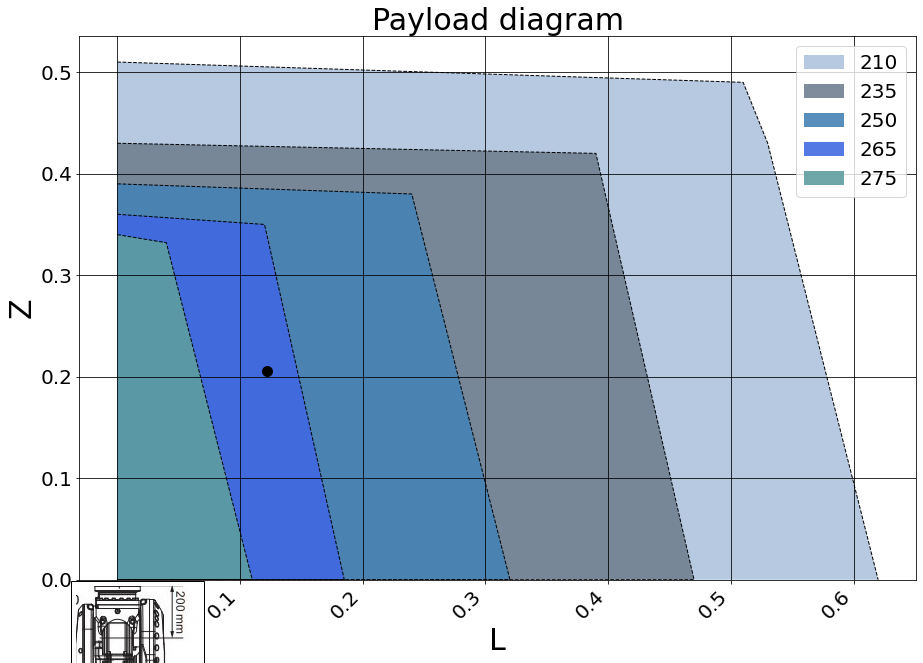

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,10))

labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')
text='L'
text1='Z'
ax.set_xlabel(text,fontsize=30)
ax.set_ylabel(text1,fontsize=30)
ax.set_title('Payload diagram',fontsize=30)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')
plt.setp(labels, rotation=45,fontsize=20, horizontalalignment='right')
plt.setp(labels1,fontsize=20, horizontalalignment='right')
colores=['lightsteelblue','slategrey','steelblue','royalblue','cadetblue']


x=0
j=1

for i in range(int(len(df.columns.values.tolist())/2)):
   y=colores[i]
   ax.stackplot(df[df.columns.values.tolist()[i+x]], df[df.columns.values.tolist()[i+j]], alpha=0.9,colors=y,labels=legends[i]) 
   x=x+1
   j=j+1
plt.legend(df.columns.values.tolist(),fontsize='xx-large',loc='best')

x=0
j=1
for i in range(int(len(df.columns.values.tolist())/2)):
   ax.plot(df[df.columns.values.tolist()[i+x]], df[df.columns.values.tolist()[i+j]], linewidth=1.0,color='black',ls='--')
   x=x+1
   j=j+1

ax.plot(l,Coz/1000, 'o',markersize=10, color='black')
xy = [0, 0]


imagebox = OffsetImage(image, zoom=1)
imagebox.image.axes = ax

ab = AnnotationBbox(imagebox, xy,
                    xybox=(20, -65),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    arrowprops=dict(
                        arrowstyle="->",
                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )

ax.add_artist(ab)
ax.legend(fontsize=20)

plt.show()


